# Implementation using only numpy

#### Notes

1. Changed the date and time in three rows manually to make the format consistent
2. matplotlib was used for EDA

## Loading numpy and raw data

In [1]:
import numpy as np

In [2]:
raw_data=np.genfromtxt('./Raw Data/database.csv',delimiter=',',dtype=None,names=True)

In [3]:
#Extracting date and time
date=np.array([(bytes.decode(x)).split('/') for x in raw_data['Date']])
date=np.array([((x[-1])+'-'+x[0]+'-'+x[-2:][0]) for x in date],dtype='U10')
time=np.array([(bytes.decode(x)) for x in raw_data['Time']],dtype='U8')
dateTime = np.array([(date[i]+'T'+time[i]+'Z') for i in range(len(date))],dtype='U20')
dateTime=dateTime.astype('datetime64[s]')

#Keeping only relevant columns
req_data=raw_data[['Latitude','Longitude','Magnitude']]

/home/arsh/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future


## Exploratory Data Analysis

In [4]:
import matplotlib.pyplot as plt

### Year-wise Distribution

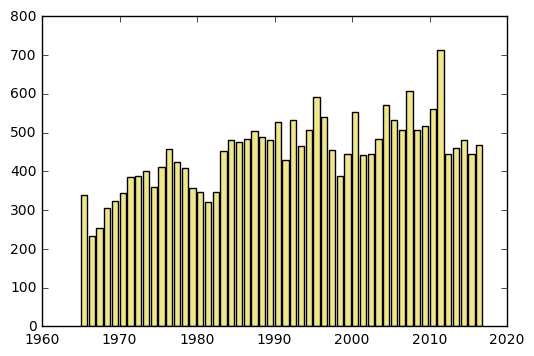

In [5]:
year = dateTime.astype('datetime64[Y]').astype(int) + 1970
year=np.unique(year,return_counts=True)

plt.bar(year[0],year[1],color='khaki')
plt.show()

### Month-wise Distribution

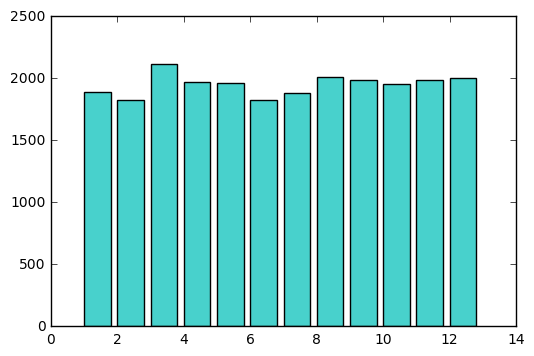

In [6]:
month = dateTime.astype('datetime64[M]').astype(int) % 12 + 1
month=np.unique(month,return_counts=True)

plt.bar(month[0],month[1],color='mediumturquoise')
plt.show()

### Earthquake Prone Areas 

In [44]:
import plotly
from plotly.plotly import iplot

In [ ]:
data = [ dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = req_data['Longitude'],
        lat = req_data['Latitude'],
        text = ['Magnitude = '+str(s) for s in list(req_data['Magnitude'])],
        mode = 'markers',
        marker = dict( 
            size = 7, 
            opacity = 0.8,
            autocolorscale = True,
            symbol = 'circle',
            line = dict(
                width=0.5,
                color='rgba(102, 102, 102)'
            ),
            cmin = 5.5,
            color = req_data['Magnitude'],
            cmax = req_data['Magnitude'].max(),
            colorbar=dict(
                title="Magnitude"
            )
        ))]

layout = dict(
        title = 'Earthquake Prone Areas',
        colorbar=True,
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5        
        ),
    )

fig = dict( data=data, layout=layout )
iplot(fig,validate=False,filename='USA-earthquakes')